# Notebook para testear las funciones de la librería `toolbox_ML`.

## Importar librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_diabetes, load_iris

import toolbox_ML as tb


## Cargar datasets

In [2]:
# Variables que NO son DataFrames
variable_list = [1, 2, 3]

# Cargar dataset en local
df_ads = pd.read_csv('./data/advertising_ml.csv', index_col=None)
df_boston = pd.read_csv('./data/boston_houses.csv', sep='|')
df_housing = pd.read_csv('./data/ejemplo_housing.csv')
df_lifesat = pd.read_csv('./data/lifesat_full.csv')
df_titanic = pd.read_csv('./data/titanic.csv')

# Importar datasets de sklearn.datasets
df_iris = pd.DataFrame(load_iris()['data'], columns=load_iris()['feature_names'])
df_diabetes = pd.DataFrame(load_diabetes()['data'], columns=load_diabetes()['feature_names'])

## Función "describe_df".

In [3]:
tb.describe_df(df_titanic)

COL_N,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
DATA_TYPE,int64,int64,object,float64,int64,int64,float64,object,object,object,bool,object,object,object,bool
MISSING (%),0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.22,0.0,0.0,0.0,77.22,0.22,0.0,0.0
UNIQUE_VALUES,2,3,2,88,7,7,248,3,3,3,2,7,3,2,2
CARDIN (%),0.22,0.34,0.22,9.88,0.79,0.79,27.83,0.34,0.34,0.34,0.22,0.79,0.34,0.22,0.22


In [4]:
tb.describe_df(df_iris)

COL_N,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
DATA_TYPE,float64,float64,float64,float64
MISSING (%),0.0,0.0,0.0,0.0
UNIQUE_VALUES,35,23,43,22
CARDIN (%),23.33,15.33,28.67,14.67


In [5]:
try:
    tb.describe_df(variable_list)
except Exception as e:
    print(f'Error: {e}')

Error: Expected a pandas DataFrame


## Función "typify_variables".

In [6]:
tb.typify_variables(df_boston)

,nombre_variable,tipo_sugerido
0,CRIM,Numérica Continua
1,ZN,Numérica Discreta
2,INDUS,Numérica Discreta
3,CHAS,Binaria
4,NOX,Numérica Discreta
5,RM,Numérica Continua
6,AGE,Numérica Continua
7,DIS,Numérica Continua
8,RAD,Categórica
9,TAX,Numérica Discreta


In [7]:
try:
    tb.typify_variables(df_boston, umbral_categoria=12.6, umbral_continua=30)
except Exception as e:
    print(f'Error: {e}')

Error: Thresholds must be an integer and a float, respectively


In [8]:
try:
    tb.typify_variables(variable_list, umbral_categoria=12.6, umbral_continua=30)
except Exception as e:
    print(f'Error: {e}')

Error: Expected a pandas DataFrame


## Función "get_features_num_regression".

In [9]:
tb.get_features_num_regression(variable_list, 'survived', umbral_corr=0.07, pvalue=0.40)

Error: No se ha introducido un DataFrame válido.


In [10]:
# La supervivencia del Titanic es un ejemplo de clasificación, y por tanto la cardinalidad del problema es baja
tb.get_features_num_regression(df_titanic, 'survived', umbral_corr=0.07, pvalue=0.40)

Error: survived es una columna numérica discreta, con baja cardinalidad.


In [11]:
# Valores de umbral_corr
umbral_corr_values = np.arange(0.01, 0.5, 0.1)
results = {}

for umbral_corr in umbral_corr_values:
    features = tb.get_features_num_regression(df_housing, 'median_house_value', umbral_corr=umbral_corr, pvalue=0.40, umbral_card=12.5)
    results[umbral_corr] = features
    print(f"Umbral de Correlación: {round(umbral_corr, 2)} -> Features: {features}")


Umbral de Correlación: 0.01 -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Umbral de Correlación: 0.11 -> Features: ['latitude', 'total_rooms', 'median_income']
Umbral de Correlación: 0.21 -> Features: ['median_income']
Umbral de Correlación: 0.31 -> Features: ['median_income']
Umbral de Correlación: 0.41 -> Features: ['median_income']


In [12]:
# Valores de p-value desde 0.05 hasta 1.0, con un paso de 0.05
p_values = np.arange(0.05, 1.1, 0.1)  
# p_values = np.arange(0.001, 0.1, 0.001)  
results = {}

for p_value in p_values:
    features = tb.get_features_num_regression(df_housing, 'median_house_value', umbral_corr=0.01, pvalue=p_value, umbral_card=12.5)
    results[p_value] = features
    print(f"p-value: {round(p_value, 2)} -> Features: {features}")


p-value: 0.05 -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
p-value: 0.15 -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
p-value: 0.25 -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
p-value: 0.35 -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
p-value: 0.45 -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
p-value: 0.55 -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
p-value: 0.65 -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_

## ¡¡WARNING!! --> Me mosquea que no haya variaciones con p_value.

In [13]:
# Valores de umbral_corr
umbral_corr_values = np.arange(0.01, 0.5, 0.1)
p_values = np.arange(0.05, 1.1, 0.1)
p_values = np.arange(0.001, 0.1, 0.001)  

results = {}

for umbral_corr in umbral_corr_values:
    print('\n')
    for p_value in p_values:
        features = tb.get_features_num_regression(df_housing, 'median_house_value', umbral_corr=umbral_corr, pvalue=p_value, umbral_card=12.5)
        print(f"(umbral_corr, p_value) = {(round(float(umbral_corr), 2), round(float(p_value), 3))} -> Features: {features}")



(umbral_corr, p_value) = (0.01, 0.001) -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
(umbral_corr, p_value) = (0.01, 0.002) -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
(umbral_corr, p_value) = (0.01, 0.003) -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
(umbral_corr, p_value) = (0.01, 0.004) -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
(umbral_corr, p_value) = (0.01, 0.005) -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
(umbral_corr, p_value) = (0.01, 0.006) -> Features: ['longitude', 'latitude', 'housing_median_age', 'total_r

In [14]:
tb.get_features_num_regression(df_housing, 'ocean_proximity', umbral_corr=0.07, pvalue=0.40)

Error: ocean_proximity no es una columna numérica.


In [15]:
tb.get_features_num_regression(df_housing, 'xxxx', umbral_corr=0.07, pvalue=0.40)

Error: xxxx no es una columna del DataFrame.


## Función "plot_features_num_regression".

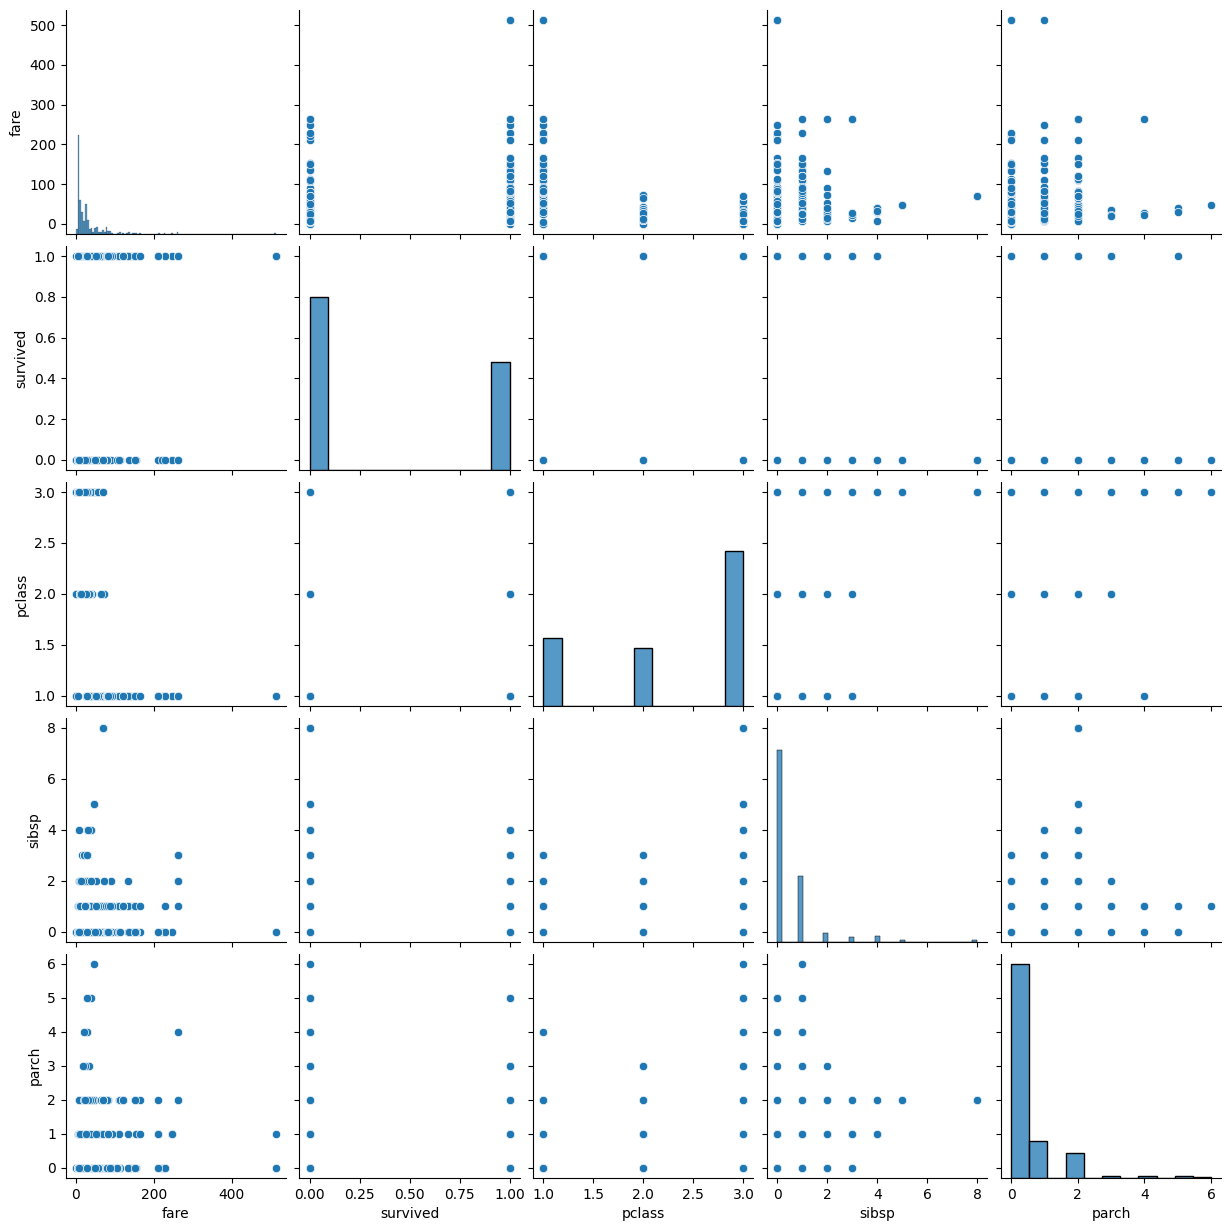

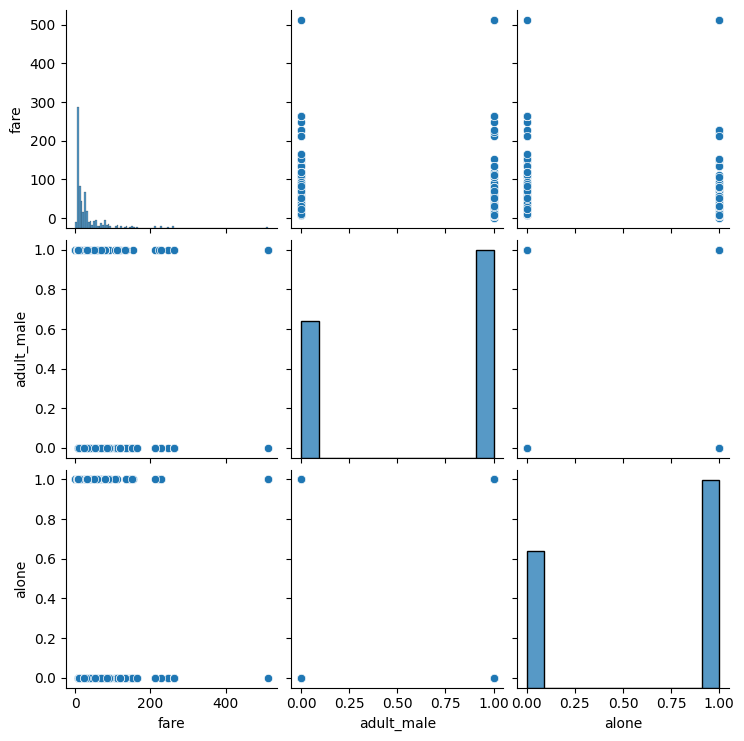

['survived', 'pclass', 'sibsp', 'parch', 'adult_male', 'alone']

In [16]:
tb.plot_features_num_regression(df_titanic, 
                                target_col="fare", 
                                columns=[])

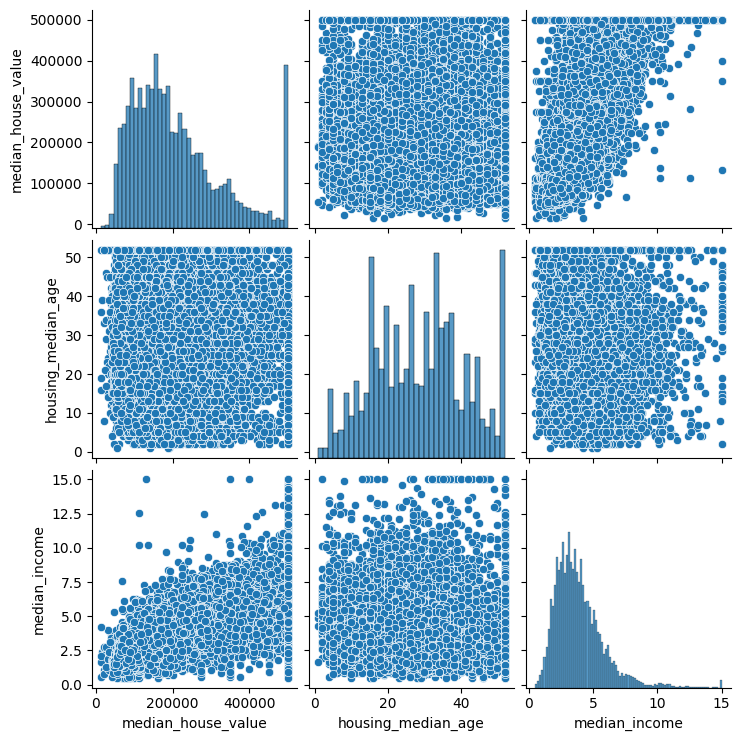

['housing_median_age', 'median_income']

In [17]:
tb.plot_features_num_regression(df_housing, 
                                target_col="median_house_value", 
                                columns=['housing_median_age', 'median_income'],
                                umbral_corr = 0.07,
                                pvalue=0.40)

In [23]:
tb.plot_features_num_regression(df_housing)

Error:  no es una columna del DataFrame.


In [18]:
tb.plot_features_num_regression(df_housing, 
                                target_col="median_house_value", 
                                columns=['housing_median_age', 'median_income'],
                                umbral_corr = 0.8,
                                pvalue=0.05)

Ninguna columna cumple con los criterios de correlación y significancia.


In [19]:
tb.plot_features_num_regression(df_housing, 
                                target_col="precio", 
                                columns=['housing_median_age', 'median_income'],
                                umbral_corr = 0.8,
                                pvalue=0.05)

Error: precio no es una columna del DataFrame.


## Función "get_features_cat_regression".

In [20]:
tb.get_features_cat_regression(df_housing, "median_house_value", pvalue=0.05)

['ocean_proximity']

In [21]:
tb.get_features_cat_regression(df_lifesat, "Life satisfaction", pvalue=0.1)

[]

## Función "plot_features_cat_regression".

In [22]:
# PENDIENTE